In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df = pd.read_excel("/content/1730285881-Airbnb_Open_Data (1).xlsx")

In [15]:
df['number of reviews'] = df['number of reviews'].fillna(0).astype(int)
review_threshold = df['number of reviews'].quantile(0.75)
df['Popular'] = (df['number of reviews'] > review_threshold).astype(int)

In [16]:
features = ['price', 'minimum nights', 'room type', 'neighbourhood group', 'cancellation_policy', 'host_identity_verified']


In [17]:
numerical_features = ['price', 'minimum nights']
for col in numerical_features:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(df[col].median())


In [18]:
categorical_features = ['room type', 'neighbourhood group', 'cancellation_policy', 'host_identity_verified']
for col in categorical_features:
    df[col] = df[col].fillna('missing').astype(str)

In [19]:
df_processed = pd.get_dummies(df[features], columns=categorical_features, drop_first=True)
X = df_processed
y = df['Popular']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [21]:
scaler = StandardScaler()
cols_to_scale = [col for col in numerical_features if col in X_train.columns]
if cols_to_scale:
    X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
    X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [23]:
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [24]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [25]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

[Text(0, 0, 'Not Popular'), Text(0, 1, 'Popular')]

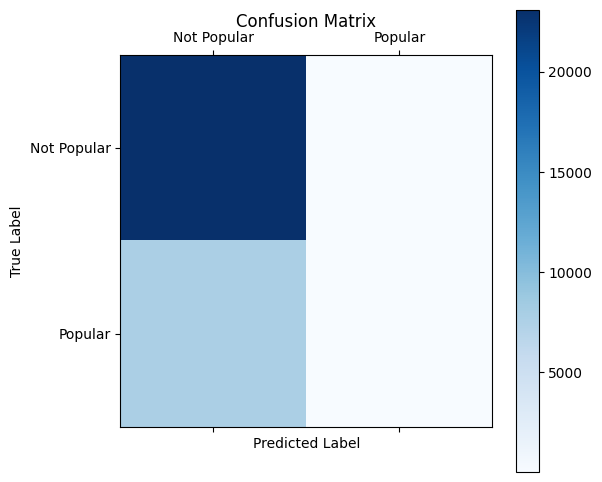

In [26]:
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_title('Confusion Matrix', pad=20)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Not Popular', 'Popular'])
ax.set_yticklabels(['Not Popular', 'Popular'])


In [27]:
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center', color='red')

plt.savefig('confusion_matrix.png')
plt.close()

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')
plt.close()

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7505523066926576
Confusion Matrix:
 [[23099     5]
 [ 7673     3]]
ROC AUC Score: 0.6362099234952199


In [28]:
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_title('Confusion Matrix', pad=20)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Not Popular', 'Popular'])
ax.set_yticklabels(['Not Popular', 'Popular'])
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center', color='red')

plt.savefig('confusion_matrix.png')
plt.close()

In [29]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')
plt.close()

In [30]:
neighbourhood_counts = df['neighbourhood group'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(neighbourhood_counts.index, neighbourhood_counts.values, color='skyblue')

plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.title('Distribution of Airbnb Listings by Neighbourhood Group', fontsize=14)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, int(yval), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('neighbourhood_group_bar_chart.png')
plt.close()


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# ===================== Logistic Regression =====================
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.matshow(conf_matrix_lr, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_title('Confusion Matrix - Logistic Regression', pad=20)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Not Popular', 'Popular'])
ax.set_yticklabels(['Not Popular', 'Popular'])
for (i, j), val in np.ndenumerate(conf_matrix_lr):
    ax.text(j, i, f'{val}', ha='center', va='center', color='red')
plt.savefig('confusion_matrix_logistic_regression.png')
plt.close()

# ROC Curve
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure(figsize=(6, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('roc_curve_logistic_regression.png')
plt.close()

print("===== Logistic Regression =====")
print(f"Accuracy: {accuracy_lr}")
print("Confusion Matrix:\n", conf_matrix_lr)
print("ROC AUC Score:", roc_auc_lr)


# ===================== K-Nearest Neighbors =====================
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]

accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.matshow(conf_matrix_knn, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_title('Confusion Matrix - KNN', pad=20)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Not Popular', 'Popular'])
ax.set_yticklabels(['Not Popular', 'Popular'])
for (i, j), val in np.ndenumerate(conf_matrix_knn):
    ax.text(j, i, f'{val}', ha='center', va='center', color='red')
plt.savefig('confusion_matrix_knn.png')
plt.close()

# ROC Curve
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.figure(figsize=(6, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.savefig('roc_curve_knn.png')
plt.close()

print("===== KNN =====")
print(f"Accuracy: {accuracy_knn}")
print("Confusion Matrix:\n", conf_matrix_knn)
print("ROC AUC Score:", roc_auc_knn)


# ===================== Extra Visualization: Bar Chart =====================
# Same chart for both models (airbnb dataset distribution)
neighbourhood_counts = df['neighbourhood group'].value_counts().sort_values(ascending=False)

# For Logistic Regression
plt.figure(figsize=(10, 6))
bars = plt.bar(neighbourhood_counts.index, neighbourhood_counts.values, color='skyblue')
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.title('Distribution of Airbnb Listings by Neighbourhood Group - Logistic Regression', fontsize=14)
plt.xticks(rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, int(yval), ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.savefig('neighbourhood_group_bar_chart_logistic_regression.png')
plt.close()

# For KNN
plt.figure(figsize=(10, 6))
bars = plt.bar(neighbourhood_counts.index, neighbourhood_counts.values, color='skyblue')
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.title('Distribution of Airbnb Listings by Neighbourhood Group - KNN', fontsize=14)
plt.xticks(rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, int(yval), ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.savefig('neighbourhood_group_bar_chart_knn.png')
plt.close()


===== Logistic Regression =====
Accuracy: 0.7505523066926576
Confusion Matrix:
 [[23096     8]
 [ 7670     6]]
ROC AUC Score: 0.6026513273149465
===== KNN =====
Accuracy: 0.7066926575698506
Confusion Matrix:
 [[20289  2815]
 [ 6213  1463]]
ROC AUC Score: 0.584090895404282
